In [1]:
from glob import glob
import sys
import getpass
import os
# import psutil
from os.path import join, dirname
from os.path import getsize
import pickle
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.stats.multitest
# from statsmodels.sandbox.stats.multicomp import multipletests

# import nilearn.masking
from nilearn import plotting as nplt
from nilearn import image as niimg
import nilearn.decoding

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
# from sklearn.svm import LinearSVC

# import mydef as my Class correction for projects
import mydef

/usr/local/anaconda3/envs/sampark/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
GA = mydef.GA()

Google Drive is detected!


# Yera and Yunha's correlation matrix

In [12]:
# data_dir = join(GA.dir_root,'NAS05_data','fmri_data','glm_results','MO_errts')
# temp = join(data_dir,'network_analysis','20200213_MOerrts_AM1_corrmat.pkl')
# with open(temp,"rb") as file:
#     print(temp)
#     ## key: subj, run, (roiA, roiB)
#     ## value: Correlation Coefficient
#     corrmat = pickle.load(file)

/Users/clmn/Google Drive/내 드라이브/GA/NAS05_data/fmri_data/glm_results/MO_errts/network_analysis/20200213_MOerrts_AM1_corrmat.pkl


# Visual areas and DMN Core

In [3]:
GA.load_fan()

In [4]:
## DMN regions
module_names = ['Core']

for name in module_names:
    temp = glob(join(GA.dir_dmn, name+'_*.nii'))
    for path in temp:
        fname = path.split('/')[-1].replace('.nii', '')
        GA.roi_imgs[fname] = nilearn.image.load_img(path)

## yeo_17network == 1
dt = pd.DataFrame()
for nn in [1]:
    dt = dt.append(GA.fan_info[(GA.fan_info.yeo_17network == nn)])
for idx in dt.index:
    nn = dt.loc[idx,'label']
    region = dt.loc[idx,'region']
    GA.roi_imgs[region] = GA.fan_imgs[str(nn)]

GA.roi_imgs.keys()

dict_keys(['Core_PCC_r', 'Core_aMPFC_l', 'Core_PCC_l', 'Core_aMPFC_r', 'FuG_L_3_2', 'FuG_R_3_2', 'MVOcC_L_5_1', 'MVOcC_R_5_1', 'MVOcC_L_5_3', 'MVOcC_R_5_3', 'MVOcC_R_5_4', 'LOcC_L_4_1', 'LOcC_R_4_1', 'LOcC_L_4_3', 'LOcC_R_4_3', 'LOcC_L_4_4', 'LOcC_R_4_4', 'LOcC_L_2_2'])

## calculating task-related networks

In [8]:
# subj = '01'
# visit = 'early'
# run = 1

# GA.make_wit_functional_correl_from_tsmean(subj, visit, run, GA.roi_imgs.keys())

,subj,visit,mapping,run,roiA,roiB,Pearson_r,pval
0,01,early,practice,1,Core_PCC_l,Core_PCC_l,1.000000,0.000000e+00
1,01,early,practice,1,Core_PCC_l,Core_PCC_r,0.898462,0.000000e+00
2,01,early,practice,1,Core_PCC_l,Core_aMPFC_l,0.694388,1.579097e-158
3,01,early,practice,1,Core_PCC_l,Core_aMPFC_r,0.574191,3.919469e-97
4,01,early,practice,1,Core_PCC_l,FuG_L_3_2,0.434554,1.058436e-51
...,...,...,...,...,...,...,...,...
319,01,early,unpractice,6,MVOcC_R_5_4,MVOcC_L_5_1,0.825047,1.823948e-273
320,01,early,unpractice,6,MVOcC_R_5_4,MVOcC_L_5_3,0.607123,2.321859e-111
321,01,early,unpractice,6,MVOcC_R_5_4,MVOcC_R_5_1,0.755544,3.489742e-203
322,01,early,unpractice,6,MVOcC_R_5_4,MVOcC_R_5_3,0.789492,3.600201e-234


## Comparing them

In [30]:
# gg = 'GA' if visit=='early' else ('GB' if visit=='late' else None)
# mapping = 'practice' if run <= 3 else('unpractice' if run > 3 else 'invalid')

# coef_YY = []
# coef = np.array(GA.wit_functional_correl.Pearson_r)

# sorted_rois = sorted(GA.roi_imgs.keys())
# for roiA in sorted_rois:
#     for roiB in sorted_rois:
#         coef_YY.append(corrmat[gg+subj,run,(roiA,roiB)])
# coef_YY = np.array(coef_YY)

In [1]:
# coef - coef_YY

$\textbf{Conclusion}$: '20200213_MOerrts_AM1_corrmat.pkl' == My correlation matrix, 'GA.wit_functional_correl'

# Functional Correlation Matrix

### tsmean

In [5]:
temp = GA.wit_functional_correl

for subj in GA.list_subj:
    for visit in ['early','late']:
        GA.make_wit_functional_correl_from_tsmean(
            subj, visit, 'practice'
            , GA.roi_imgs.keys())
        temp = temp.append(GA.wit_functional_correl)
GA.wit_functional_correl = temp

### errts

In [5]:
temp = GA.wit_functional_correl
    
for subj in GA.list_subj:
    for visit in ['early','late']:
        GA.make_wit_functional_correl_from_errts(
            subj, visit, 'practice'
            , fdir='GLM.MO', fname='global_activity.bp_demean.errts.MO'
            , rois=GA.roi_imgs
        )
        temp = temp.append(GA.wit_functional_correl)
GA.wit_functional_correl = temp

In [17]:
GA.save_pkl(GA.wit_functional_correl, suffix="global_activity.bp_demean.errts.MO.functional_correlation.visual-core")

### groupby

In [6]:
df = GA.wit_functional_correl.groupby(['subj','visit','mapping','roiA','roiB']).mean()
del df['pval']
df

Pearson_r
subj visit mapping  roiA        roiB                   
01   early practice Core_PCC_l  Core_PCC_r     0.746320
                                Core_aMPFC_l   0.460233
                                Core_aMPFC_r   0.176130
                                FuG_L_3_2      0.065526
                                FuG_R_3_2      0.058139
...                                                 ...
44   late  practice MVOcC_L_5_3 MVOcC_R_5_3    0.179870
                                MVOcC_R_5_4   -0.055071
                    MVOcC_R_5_1 MVOcC_R_5_3    0.431427
                                MVOcC_R_5_4    0.194045
                    MVOcC_R_5_3 MVOcC_R_5_4    0.568331

[9180 rows x 1 columns]

In [7]:
sorted_rois = sorted(set(list(GA.wit_functional_correl.roiA.unique())+list(GA.wit_functional_correl.roiB.unique())))

In [8]:
## group the indices by network
group = [1*(i>=4) for i, _ in enumerate(sorted_rois)]
nn = group[-1]+1  ## A number of networks
group

[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

### *functional connectivity matrices (run once)

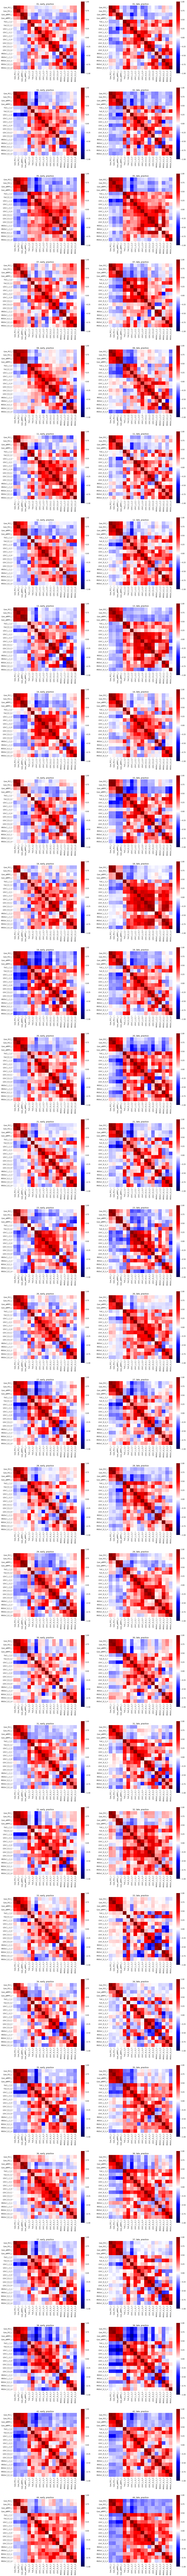

In [9]:
subjs = GA.list_subj
fig, axes = plt.subplots(nrows=len(subjs), ncols=2, figsize=(20, len(subjs)*10))
## initializing a group matrix
df_Gmat = {}
for visit in ['early', 'late']:
    for mapping in ['practice']:
        df_Gmat[visit,mapping] = pd.DataFrame(np.zeros((len(sorted_rois),len(sorted_rois))), columns=sorted_rois, index=sorted_rois)
for i, subj in enumerate(subjs):
    print(subj, end='\r')
    for j, visit in enumerate(['early', 'late']):
        for k, mapping in enumerate(['practice']):
            ## initializing a matrix
            df_mat = pd.DataFrame(np.zeros((len(sorted_rois),len(sorted_rois))), columns=sorted_rois, index=sorted_rois)
            ## fill the individual matrix with their proper elements
            for a, roiA in enumerate(sorted_rois):
                df_mat.loc[roiA][roiA] = 1.
                for t, roiB in enumerate(sorted_rois[a+1:]):
                    b = t+a+1
                    df_mat.loc[roiA][roiB] = df.loc[subj,visit,mapping,roiA,roiB]['Pearson_r']
                    df_mat.loc[roiB][roiA] = df_mat.loc[roiA][roiB]
            ## append df_mat to the group matrix
            df_Gmat[visit,mapping] += df_mat
            ## plot matrices by an individual subject
            ax = sns.heatmap(df_mat
                             , square=True, cmap='seismic', cbar=True
#                              , robust=True
                             , vmin=-1., vmax=1.
                             , xticklabels=sorted_rois, yticklabels=sorted_rois, ax=axes[i][1*j+k])
            ax.set_title('%s, %s, %s'%(subj, visit, mapping))
# fig.savefig(fname=join(GA.dir_script,'matrices','%s_DMN_core-Yeo1_individual.MO.RO.png'%GA.today))

In [10]:
## divide by a number of subjects to obtain the average value
for visit in ['early', 'late']:
    for mapping in ['practice']:
        for roiA in sorted_rois:
            for roiB in sorted_rois:
                df_Gmat[visit,mapping].loc[roiA,roiB] /= 30

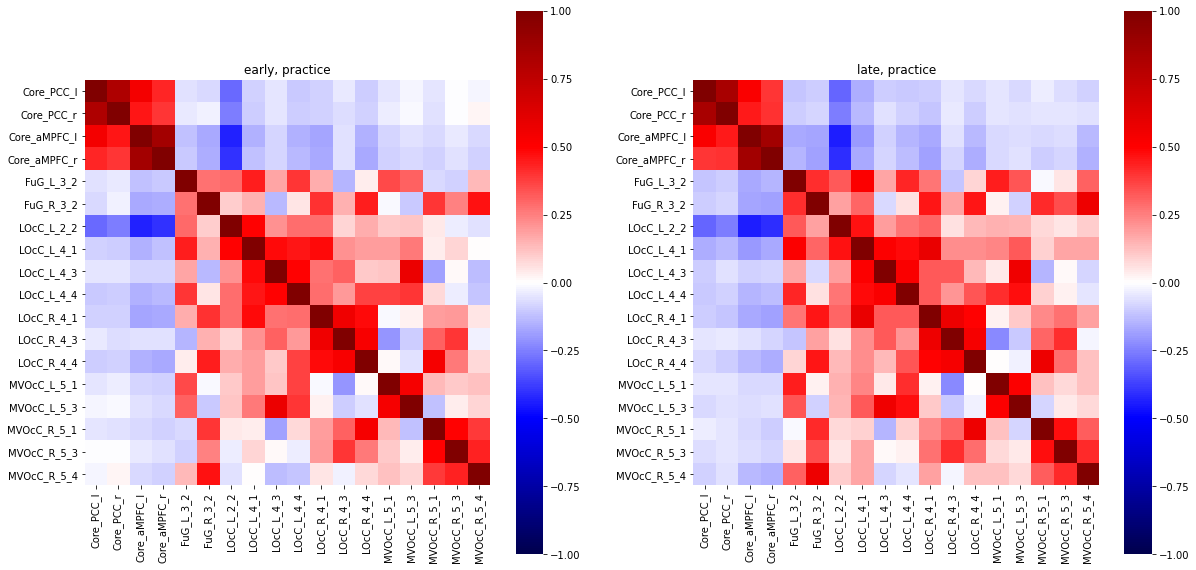

In [11]:
## plot group 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
for i, visit in enumerate(['early', 'late']):
    for j, mapping in enumerate(['practice']):
        ax = sns.heatmap(df_Gmat[visit,mapping]
                         , square=True, cmap='seismic', cbar=True
        #                  , robust=True
                         , vmin=-1., vmax=1.
                         , xticklabels=sorted_rois, yticklabels=sorted_rois, ax=axes[1*i+j])
        ax.set_title('%s, %s'%(visit, mapping))

### Recruitment

In [12]:
mapping = 'practice'
intg = []
for subj in GA.list_subj:
    intstr_e = GA.calc_interaction_strength(subj, 'early', mapping, group)
    intstr_l = GA.calc_interaction_strength(subj, 'late', mapping, group)
    res = intstr_l[0,1]-intstr_e[0,1]
    print('%s : %.5f - %.5f = %.5f'%(subj,intstr_l[0,1],intstr_e[0,1],res))
    intg.append(res)

01 : -0.43603 - -0.24564 = -0.19039
02 : -0.50111 - -0.34028 = -0.16083
05 : -0.35082 - -0.45830 = 0.10748
07 : -0.33200 - 0.10545 = -0.43745
08 : -0.28721 - -0.12516 = -0.16205
11 : -0.23578 - -0.30592 = 0.07014
12 : -0.21866 - -0.38346 = 0.16479
13 : -0.36207 - -0.30241 = -0.05966
14 : -0.15852 - -0.32701 = 0.16850
15 : -0.59531 - -0.32255 = -0.27276
18 : -0.26828 - -0.12297 = -0.14531
19 : -0.42821 - -0.62292 = 0.19471
20 : -0.44463 - -0.29421 = -0.15043
21 : -0.43922 - -0.23181 = -0.20741
23 : -0.51506 - -0.51754 = 0.00248
26 : -0.12754 - -0.16433 = 0.03678
27 : -0.40399 - -0.38227 = -0.02172
28 : -0.45456 - -0.14560 = -0.30896
29 : -0.31004 - -0.33519 = 0.02515
30 : -0.16970 - -0.18042 = 0.01072
31 : -0.22928 - -0.40027 = 0.17099
32 : -0.03063 - -0.20395 = 0.17332
33 : 0.08305 - -0.02345 = 0.10650
34 : -0.23745 - -0.29382 = 0.05637
35 : -0.25245 - -0.36587 = 0.11342
36 : -0.32813 - -0.12099 = -0.20713
37 : -0.23055 - -0.30642 = 0.07587
38 : -0.67817 - -0.65218 = -0.02599
42 : -0.4

### Partial Correlation by training_day

In [20]:
X = intg
Y = GA.del_RewardRate

In [21]:
with open(join(GA.dir_behav,'training_day_n30.1D'),'r') as fr:
    Z = np.genfromtxt(fr, delimiter='\n')

### Plot

In [13]:
X = intg

In [14]:
Y = GA.del_RewardRate

Text(0.5, 1.0, 'r=0.0081 (p=0.966)')

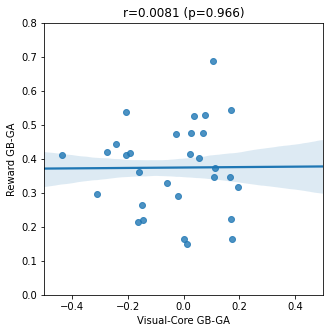

In [15]:
fig = plt.figure(figsize=(5, 5))
plt.xlim(-0.5, 0.5)
plt.ylim(-0., 0.8)
sns.regplot(x=X, y=Y, ci=68, truncate=False)
plt.ylabel('Reward GB-GA')
plt.xlabel('Visual-Core GB-GA')
plt.title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))

In [16]:
## Lower-Tailed t-Test
scipy.stats.ttest_1samp(X, popmean=0, alternative='less')

Ttest_1sampResult(statistic=-1.196681595384798, pvalue=0.12056125782076305)

## Fan280

In [6]:
GA.__init__()
GA.load_fan()

Google Drive is detected!


In [7]:
## make full mask
fname = join(GA.dir_mask,'fan280','fan.roi.GA.001.nii.gz')
fmask = nilearn.image.load_img(fname)
temp = nilearn.image.math_img(img1=fmask, formula='img1 * 0.')
for region, img in GA.fan_imgs.items():
    temp = nilearn.image.math_img(img1=temp, img2=img, formula='img1 + img2')
global_mask = temp

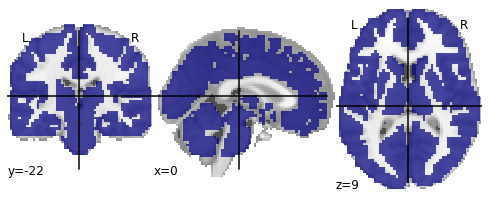

In [9]:
fig = nilearn.plotting.plot_roi(global_mask)

In [12]:
# fig.savefig(join(GA.dir_gDrive,'fan_overall.png'))

# Yera and Yunha's results

In [15]:
data_dir = join(GA.dir_root,'NAS05_data','fmri_data','glm_results','MO_errts')

## a recruitment file (Late - Early)

In [16]:
with open(join(data_dir,'MO_errts_AM1_recruitment_prac_late-early.pkl'),'rb') as fr:
    ## key: mapping, ()
    recruitment = pickle.load(file=fr)

## transposing the recruitment file to DataFrame

In [21]:
temp = pd.read_csv(join(data_dir,'conn_comb.tsv'), index_col=0)
temp

,subj,prac,behav,rcr_dmn,rcr_core,rcr_dmsub,rcr_core_dmsub,rcr_vis,rcr_mot,intg_vis_dmn,...,intg_vis_dmsub,intg_vis_core_dmsub,intg_mot_dmn,intg_mot_core,intg_mot_dmsub,intg_mot_core_dmsub,intg_task_dmn,intg_task_core,intg_task_dmsub,intg_task_core_dmsub
1,GA01,prac,0.417419,-0.103570,-0.118566,-0.062610,-0.106172,0.016287,-0.003815,-0.113725,...,-0.158438,-0.143824,-0.048679,-0.040207,-0.088327,-0.064329,-0.092550,-0.102630,-0.138719,-0.119447
2,GA02,prac,0.360081,0.013481,-0.028470,0.035389,-0.007518,0.051266,-0.100603,0.020214,...,0.033600,0.015019,0.117440,0.047972,0.116586,0.098419,0.049168,-0.006517,0.063294,0.042184
3,GA05,prac,0.346667,0.048872,0.088557,0.015633,0.039004,0.055081,0.061986,0.029226,...,0.043215,0.062298,0.068711,0.145580,0.042031,0.084334,0.056570,0.123231,0.053716,0.082903
4,GA07,prac,0.412720,-0.026085,0.042960,-0.049909,-0.018980,-0.023266,-0.181402,-0.176416,...,-0.162092,-0.209417,0.027160,0.014286,0.036141,0.031276,-0.108028,-0.170461,-0.094201,-0.130339
5,GA08,prac,0.212870,-0.171727,-0.063840,-0.094837,-0.145378,0.046188,-0.063819,-0.022113,...,-0.164946,-0.088188,0.201376,0.142111,0.096033,0.146802,0.046977,0.023879,-0.088342,-0.016496
6,GA11,prac,0.475243,-0.146506,-0.033110,-0.118157,-0.121286,-0.184554,-0.060405,-0.111644,...,-0.166317,-0.164692,-0.106477,-0.178146,-0.142495,-0.143151,-0.100386,-0.186364,-0.152574,-0.151531
7,GA12,prac,0.345544,-0.021644,0.053325,-0.040779,-0.053949,0.019848,0.040021,-0.024788,...,-0.004110,-0.018213,-0.181093,-0.143457,-0.186243,-0.165796,-0.064946,-0.098421,-0.057714,-0.059297
8,GA13,prac,0.329375,0.177759,-0.043590,0.217391,0.104026,0.185847,0.069396,0.075519,...,0.167532,0.144056,0.271868,0.192952,0.321320,0.296070,0.129210,0.105767,0.218252,0.192599
9,GA14,prac,0.545197,-0.050815,-0.050410,-0.046664,-0.068760,-0.007069,0.031257,-0.030788,...,-0.039221,-0.030967,-0.234723,-0.233454,-0.235090,-0.234472,-0.093133,-0.105166,-0.100384,-0.094693
10,GA15,prac,0.419329,-0.059917,0.041401,-0.047932,-0.030137,0.028375,-0.156555,-0.240224,...,-0.297786,-0.352405,-0.160415,-0.260338,-0.193630,-0.233928,-0.231385,-0.368954,-0.284595,-0.338021


In [22]:
recruitment['prac', ('visual', 'core')]

array([-0.13279914, -0.02584842,  0.08859066, -0.25375935, -0.02829657,
       -0.19479731, -0.08477092,  0.06945622, -0.04476205, -0.38321415,
       -0.05812683,  0.24580689, -0.1265635 , -0.3131268 ,  0.04489332,
       -0.08043432, -0.15632925, -0.18176357,  0.03461   ,  0.16250444,
       -0.04613103,  0.42788879, -0.29710829, -0.11095207,  0.2223397 ,
       -0.22697662, -0.08919894, -0.23729363, -0.08099848, -0.13813557])

In [23]:
np.array(temp['intg_vis_core'][:30])

array([-0.13279914, -0.02584842,  0.08859066, -0.25375935, -0.02829657,
       -0.19479731, -0.08477092,  0.06945622, -0.04476205, -0.38321415,
       -0.05812683,  0.24580689, -0.1265635 , -0.3131268 ,  0.04489332,
       -0.08043432, -0.15632925, -0.18176357,  0.03461   ,  0.16250444,
       -0.04613103,  0.42788879, -0.29710829, -0.11095207,  0.2223397 ,
       -0.22697662, -0.08919894, -0.23729363, -0.08099848, -0.13813557])

## plot

In [24]:
X = temp['intg_vis_core'][:30]
Y = np.array(temp.behav[:30])

Text(0.5, 1.0, 'r=-0.5492 (p=0.002)')

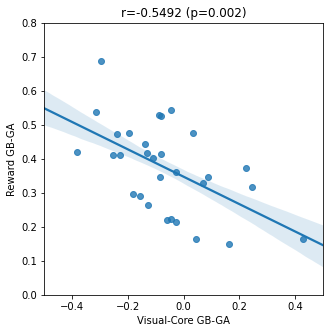

In [25]:
fig = plt.figure(figsize=(5, 5))
plt.xlim(-0.5, 0.5)
plt.ylim(-0., 0.8)
sns.regplot(x=X, y=Y, ci=68, truncate=False)
plt.ylabel('Reward GB-GA')
plt.xlabel('Visual-Core GB-GA')
plt.title('r=%.4f (p=%.3f)' % (*scipy.stats.pearsonr(x=X, y=Y),))

In [26]:
## Lower-Tailed t-Test
scipy.stats.ttest_1samp(X, popmean=0, alternative='less')

Ttest_1sampResult(statistic=-2.0615330330018002, pvalue=0.024158324680980958)